In [40]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')

%matplotlib inline

In [41]:
covid = pd.read_csv('data/covid_day_count.txt', sep=',')

In [42]:
covid

,확진일,일별 확진자 수
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2
...,...,...
555,2021-09-02,542
556,2021-09-03,566
557,2021-09-04,508
558,2021-09-05,464


In [43]:
# covid['확진일'] = pd.to_datetime(covid['확진일'], format='%Y-%m-%d')

In [44]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   확진일       560 non-null    object
 1   일별 확진자 수  560 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.9+ KB


In [45]:
month = []
for i in covid.index:
    month.append(covid['확진일'][i][0:7].replace('-',''))

In [46]:
covid['일자'] = month
covid_month = covid.groupby('일자')['일별 확진자 수'].sum()
covid_month = pd.DataFrame(covid_month)
covid_month['일자1'] = covid_month.index
covid_month


,일별 확진자 수,일자1
일자,,
202001,7,202001
202002,80,202002
202003,391,202003
202004,156,202004
202005,229,202005
202006,459,202006
202007,281,202007
202008,2415,202008
202009,1306,202009


In [47]:
covid_month = covid_month.astype({'일자1':'int'})

In [48]:
covid_month.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 202001 to 202109
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   일별 확진자 수  21 non-null     int64
 1   일자1       21 non-null     int32
dtypes: int32(1), int64(1)
memory usage: 420.0+ bytes


In [49]:
bicycle = pd.read_csv('data/bicycle1.txt', sep=',')
bicycle

,대여일자,대여소명,이용건수
0,202001,중랑센터,3
1,202001,중랑센터,1
2,202001,중랑센터,3
3,202001,상암센터 정비실,2
4,202001,상암센터 정비실,1
...,...,...,...
355818,202106,4811. 한양수자인아파트 앞,260
355819,202106,4812. 묵동 이마트 앞,1305
355820,202106,4813. 망우로 버거킹 앞,1624
355821,202106,4815. 중랑데시앙플렉스 앞,218


In [50]:
bicycle1 = bicycle.groupby('대여일자')['이용건수'].sum()
bicycle1

대여일자
202001     794162
202002     762274
202003    1533535
202004    2157390
202005    2480330
202006    2770847
202007    2582775
202008    1734558
202009    2811710
202010    2891772
202011    1990615
202012    1196965
202101     812249
202102    1234944
202103    2184641
202104    3043735
202105    2950930
202106    3462034
Name: 이용건수, dtype: int64

In [51]:
bicycle_month = pd.DataFrame(bicycle1)
bicycle_month['대여일자1'] = bicycle_month.index
bicycle_month

,이용건수,대여일자1
대여일자,,
202001,794162,202001
202002,762274,202002
202003,1533535,202003
202004,2157390,202004
202005,2480330,202005
202006,2770847,202006
202007,2582775,202007
202008,1734558,202008
202009,2811710,202009


In [52]:
covid_bicycle = covid_month.merge(bicycle_month, left_on=['일자1'], right_on=['대여일자1'])
covid_bicycle['일자1'] = pd.to_datetime(covid_bicycle['일자1'],format='%Y%m')
covid_bicycle

,일별 확진자 수,일자1,이용건수,대여일자1
0,7,2020-01-01,794162,202001
1,80,2020-02-01,762274,202002
2,391,2020-03-01,1533535,202003
3,156,2020-04-01,2157390,202004
4,229,2020-05-01,2480330,202005
5,459,2020-06-01,2770847,202006
6,281,2020-07-01,2582775,202007
7,2415,2020-08-01,1734558,202008
8,1306,2020-09-01,2811710,202009
9,733,2020-10-01,2891772,202010


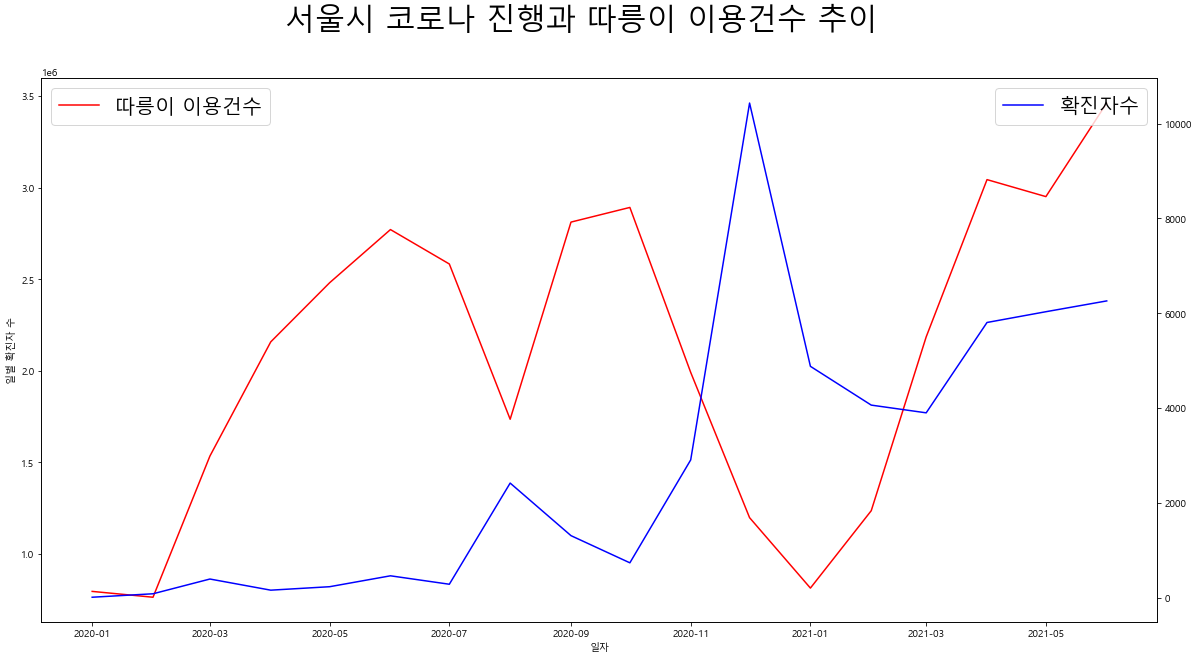

<Figure size 2160x1440 with 0 Axes>

In [53]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax1 = plt.subplots()
plt.figure(figsize=(30,20))
ax1.plot(covid_bicycle['일자1'], covid_bicycle['이용건수'], color='red', label='따릉이 이용건수')
ax2 = ax1.twinx()
ax2.plot(covid_bicycle['일자1'], covid_bicycle['일별 확진자 수'], color='blue', label='확진자수')
fig.suptitle('서울시 코로나 진행과 따릉이 이용건수 추이', fontsize=30)
ax1.set_xlabel('일자')
ax1.set_ylabel('이용건수')
ax1.set_ylabel('일별 확진자 수')
ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
plt.show()

## 2021년 겨울 자전거 이용 건수 급감했으나, 작년동기대비(5月전후) 급증했음을 알 수 있음

Text(0, 0.5, '이용건수')

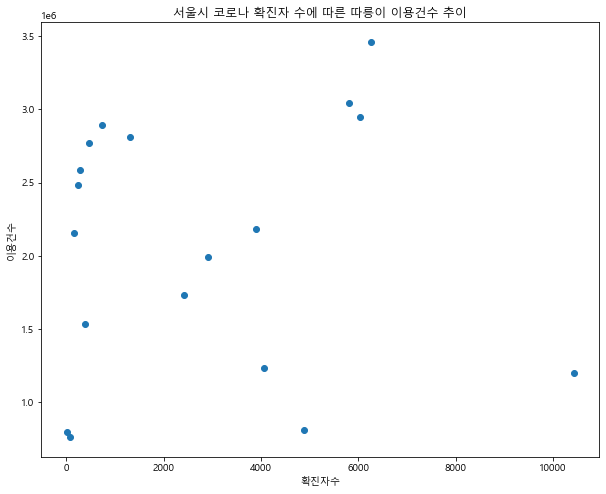

In [54]:
plt.figure(figsize=(10,8))
plt.scatter(covid_bicycle['일별 확진자 수'], covid_bicycle['이용건수'])

plt.title('서울시 코로나 확진자 수에 따른 따릉이 이용건수 추이')
plt.xlabel('확진자수')
plt.ylabel('이용건수')

In [55]:
print(covid_bicycle['일별 확진자 수'].corr(covid_bicycle['이용건수']))

0.04345268127590999


In [56]:
from statsmodels.formula.api import ols
covid_bicycle['yy'] = covid_bicycle['일별 확진자 수']
covid_bicycle['xx'] = covid_bicycle['이용건수']
res=ols('yy ~ xx',data=covid_bicycle).fit()

In [57]:
res.summary()

C:\Users\admin\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     yy   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.060
Method:                 Least Squares   F-statistic:                   0.03027
Date:                Wed, 08 Sep 2021   Prob (F-statistic):              0.864
Time:                        10:53:49   Log-Likelihood:                -168.94
No. Observations:                  18   AIC:                             341.9
Df Residuals:                      16   BIC:                             343.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2484.3659   1928.126      1.288      0.216   -1603.079    6571.811
xx             0.0001      0.001      0.174      0.864      -0.002       0.002
==============================================================================
Omnibus:                        5.393   Durbin-Watson:                   0.705
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                3.309
Skew:                           1.028   Prob(JB):                        0.191
Kurtosis:                       3.433   Cond. No.                     5.99e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 의미 없다.

In [58]:
covid_bicycle

,일별 확진자 수,일자1,이용건수,대여일자1,yy,xx
0,7,2020-01-01,794162,202001,7,794162
1,80,2020-02-01,762274,202002,80,762274
2,391,2020-03-01,1533535,202003,391,1533535
3,156,2020-04-01,2157390,202004,156,2157390
4,229,2020-05-01,2480330,202005,229,2480330
5,459,2020-06-01,2770847,202006,459,2770847
6,281,2020-07-01,2582775,202007,281,2582775
7,2415,2020-08-01,1734558,202008,2415,1734558
8,1306,2020-09-01,2811710,202009,1306,2811710
9,733,2020-10-01,2891772,202010,733,2891772


In [59]:
#covid_bicycle = covid_bicycle.drop(columns='대여일자1', axis=1)
covid_bicycle

,일별 확진자 수,일자1,이용건수,대여일자1,yy,xx
0,7,2020-01-01,794162,202001,7,794162
1,80,2020-02-01,762274,202002,80,762274
2,391,2020-03-01,1533535,202003,391,1533535
3,156,2020-04-01,2157390,202004,156,2157390
4,229,2020-05-01,2480330,202005,229,2480330
5,459,2020-06-01,2770847,202006,459,2770847
6,281,2020-07-01,2582775,202007,281,2582775
7,2415,2020-08-01,1734558,202008,2415,1734558
8,1306,2020-09-01,2811710,202009,1306,2811710
9,733,2020-10-01,2891772,202010,733,2891772


In [60]:
covid_bicycle['year'] = covid_bicycle['일자1'].dt.year
covid_bicycle['month'] = covid_bicycle['일자1'].dt.month
covid_bicycle

,일별 확진자 수,일자1,이용건수,대여일자1,yy,xx,year,month
0,7,2020-01-01,794162,202001,7,794162,2020,1
1,80,2020-02-01,762274,202002,80,762274,2020,2
2,391,2020-03-01,1533535,202003,391,1533535,2020,3
3,156,2020-04-01,2157390,202004,156,2157390,2020,4
4,229,2020-05-01,2480330,202005,229,2480330,2020,5
5,459,2020-06-01,2770847,202006,459,2770847,2020,6
6,281,2020-07-01,2582775,202007,281,2582775,2020,7
7,2415,2020-08-01,1734558,202008,2415,1734558,2020,8
8,1306,2020-09-01,2811710,202009,1306,2811710,2020,9
9,733,2020-10-01,2891772,202010,733,2891772,2020,10


In [61]:
import seaborn as sns

ValueError: cannot convert float NaN to integer

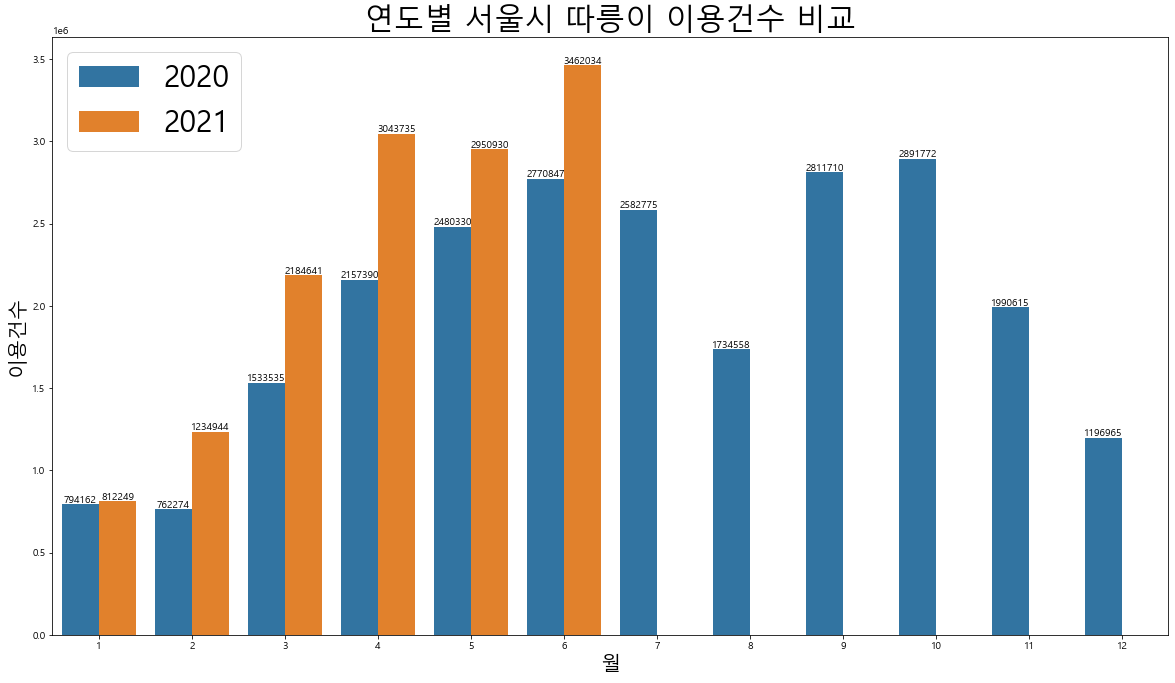

In [62]:
plt.figure(figsize=(20,11))
# plt.bar(covid_bicycle[covid_bicycle['year']==2020]['month'], covid_bicycle[covid_bicycle['year']==2020]['이용건수'], label='2020년', color='pink')
# plt.bar(covid_bicycle[covid_bicycle['year']==2021]['month'], covid_bicycle[covid_bicycle['year']==2021]['이용건수'], label='2021년', color='blue')
pl = sns.barplot(x='month', y='이용건수', hue='year', data=covid_bicycle)
plt.legend(fontsize=30)
plt.title('연도별 서울시 따릉이 이용건수 비교',fontsize=30)
plt.xlabel('월', fontsize=20)
plt.ylabel('이용건수', fontsize=20)
for temp in pl.patches:
    pl.annotate('%d'%temp.get_height(),(temp.get_x()+temp.get_width()/2 , temp.get_height()) , ha = 'center' , va='bottom')




## 작년 동기대비 따릉이 이용건수가 증가함을 보였지만,
## 확진자 수와 따릉이 이용건수 간에는 유의미한 관계를 찾을 수 없었음

In [18]:
dda_season = pd.read_csv('data/dda_season.csv')

In [19]:
dda_season

,대여 일자,대여 건수
0,2016-01-01,0
1,2016-01-01,7
2,2016-01-01,0
3,2016-01-01,9
4,2016-01-01,8
...,...,...
345999,2019-12-27,29243
346000,2019-12-28,26046
346001,2019-12-29,18701
346002,2019-12-30,22952


In [20]:
dda_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346004 entries, 0 to 346003
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   대여 일자   346004 non-null  object
 1   대여 건수   346004 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 5.3+ MB


In [21]:
dda_season['대여 일자'] = pd.to_datetime(dda_season['대여 일자'], format='%Y-%m-%d')

In [22]:
dda_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346004 entries, 0 to 346003
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   대여 일자   346004 non-null  datetime64[ns]
 1   대여 건수   346004 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.3 MB


In [23]:
dda_season['year'] = dda_season['대여 일자'].dt.year
dda_season['month'] = dda_season['대여 일자'].dt.month
dda_season

,대여 일자,대여 건수,year,month
0,2016-01-01,0,2016,1
1,2016-01-01,7,2016,1
2,2016-01-01,0,2016,1
3,2016-01-01,9,2016,1
4,2016-01-01,8,2016,1
...,...,...,...,...
345999,2019-12-27,29243,2019,12
346000,2019-12-28,26046,2019,12
346001,2019-12-29,18701,2019,12
346002,2019-12-30,22952,2019,12


In [32]:
dda_season_group = dda_season.groupby(['year','month'])['대여 건수'].sum()
dda_season_group = pd.DataFrame(dda_season_group)
dda_season_group1 = dda_season_group.reset_index(drop=False)
dda_season_group1['day'] = 1
dda_season_group1['date'] = pd.to_datetime(dda_season_group1[['year', 'month', 'day']])
dda_season_group1

,year,month,대여 건수,day,date
0,2016,1,18209,1,2016-01-01
1,2016,2,17648,1,2016-02-01
2,2016,3,51672,1,2016-03-01
3,2016,4,82011,1,2016-04-01
4,2016,5,95584,1,2016-05-01
5,2016,6,107467,1,2016-06-01
6,2016,7,124551,1,2016-07-01
7,2016,8,204128,1,2016-08-01
8,2016,9,314796,1,2016-09-01
9,2016,10,308684,1,2016-10-01


Text(0.5, 1.0, '2016~2019년도 따릉이 이용건수(계절요인확인)')

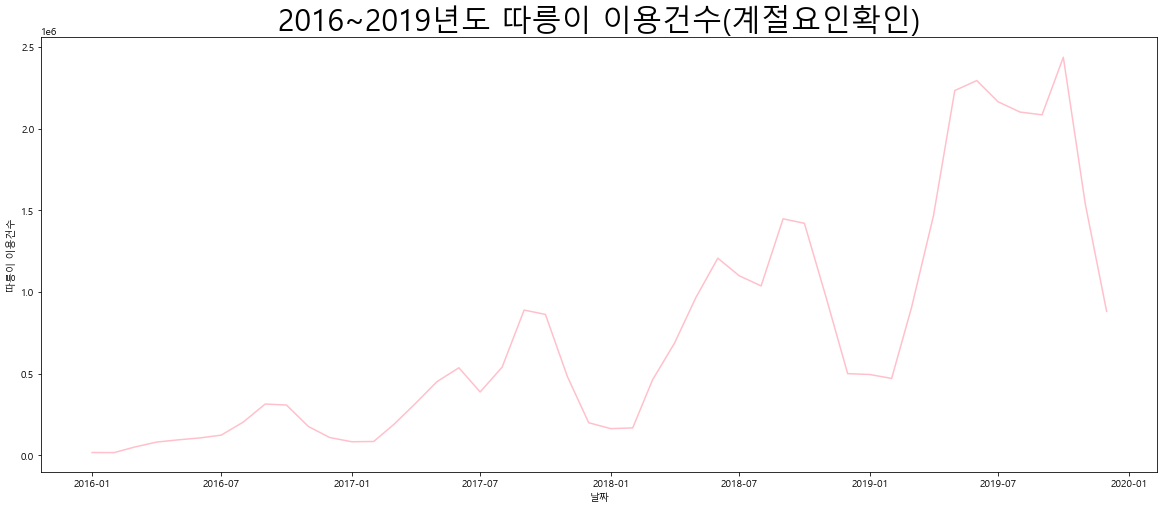

In [38]:
plt.figure(figsize=(20,8))
plt.plot(dda_season_group1['date'], dda_season_group1['대여 건수'], color='pink')
plt.xlabel('날짜')
plt.ylabel('따릉이 이용건수')
plt.title('2016~2019년도 따릉이 이용건수(계절요인확인)', fontsize=30)

## 계절성은 확인되었지만, 2021년 따릉이 이용건수가 2020년 동기대비 높은 것이 코로나로 인한 영향인지, 추세상 늘어난 값인 것인지 알 수 없게 됨